In [25]:
import numpy as np

arr = np.array((2,3,4,6,7,8,9,12,13,16,17,23,25,27,34,37,201))
arr

array([  2,   3,   4,   6,   7,   8,   9,  12,  13,  16,  17,  23,  25,
        27,  34,  37, 201])

In [26]:
q1 = np.percentile(arr, 25)  
q3 = np.percentile(arr, 75)
iqr = q3 - q1
iqr

np.float64(18.0)

In [27]:
uf = q3 + 1.5 * iqr
lf = q1 - 1.5 * iqr
uf, lf

(np.float64(52.0), np.float64(-20.0))

In [28]:
l = []
for i in arr:
    if i >= lf and i <= uf:
        l.append(i)
arr2 = np.array(l)
print(arr )
print(arr2)
    

[  2   3   4   6   7   8   9  12  13  16  17  23  25  27  34  37 201]
[ 2  3  4  6  7  8  9 12 13 16 17 23 25 27 34 37]


<Axes: >

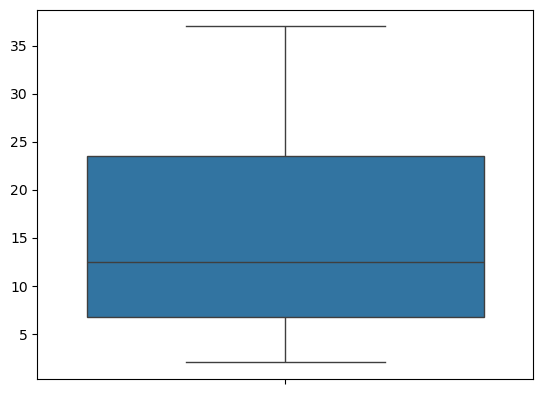

In [29]:
import seaborn as sns
sns.boxplot(arr2)



Z test using p values


In [30]:
from scipy.stats import norm
sample = [172, 173, 175, 178, 180, 181, 182, 183, 185, 186]
pop_mean = 170
pop_stdev = 5
sample_mean = np.mean(sample)
l = len(sample)
z = (sample_mean - pop_mean) / (pop_stdev / np.sqrt(l))
z

np.float64(6.008327554319921)

In [31]:
p_value = 2 * (1 - norm.cdf(abs(z)))
p_value


np.float64(1.8744683583094e-09)

In [32]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")
    

Reject the null hypothesis


In [33]:
from scipy import stats
sample = [172, 173, 175, 178, 180, 181, 182, 183, 185, 186]
sample_mean = np.mean(sample)   
sample_stdev = np.std(sample, ddof=1)
n = len(sample)
pop_mean = 180
t_statistic = (sample_mean - pop_mean) / (sample_stdev / np.sqrt(n))
t_statistic

np.float64(-0.3238751378156479)

In [34]:
p_value_t = 2 * (1 - stats.t.cdf(abs(t_statistic), df=n-1))
p_value_t

np.float64(0.7534322787251868)

In [35]:
alpha = 0.05
if p_value_t < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Accept the null hypothesis


2 sample T TEST

In [36]:
import numpy as np
from scipy import stats
group_A = np.array([5, 6, 7, 8, 9])
group_B = np.array([6, 7, 8, 9, 10])    
t_statistic, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)
t_statistic

np.float64(-1.0)

In [37]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
    

Fail to reject the null hypothesis


In [40]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [42]:
contingency_table = pd.crosstab(df['sex'], df['survived'])
contingency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [44]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
chi2, p_value, dof, expected

(np.float64(260.71702016732104),
 np.float64(1.1973570627755645e-58),
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

In [45]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


ANNOVA Test

In [46]:
import seaborn as sns
import pandas as pd
from scipy.stats import f_oneway
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [50]:
df = df[['pclass', 'age']].dropna()
df['pclass'].unique()
class_1 = df[df['pclass'] == 1]['age']
class_2 = df[df['pclass'] == 2]['age']
class_3 = df[df['pclass'] == 3]['age']
class_1

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: age, Length: 186, dtype: float64

In [52]:
f_stats, p_value = f_oneway(class_1, class_2, class_3)
f_stats, p_value

(np.float64(57.443484340676214), np.float64(7.487984171959904e-24))

In [53]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Reject the null hypothesis
